Initialization Integrator bastest
Initialize integration Duffy method


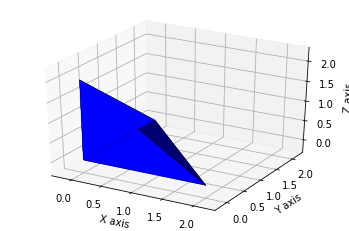

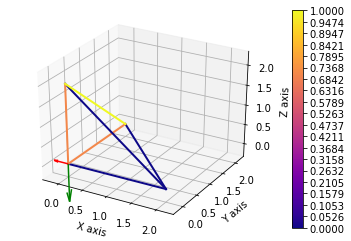

In [16]:
# Import numpy, the integrator codes, extra functions and the mesh code
import numpy as np
import Integrator_bastest as EJHM
import integrator_bastest_Duffy as EJHM_Duffy
import Basic_Integrator as simple_int
import EFIE_functions as EF
from Mesh import Mesh

############ SET INPUT PARAMETERS###################
wavelength = 100
input_mesh = "examples/sphere_z_offset.dat"
input_mesh = "examples/tetrahedron.dat"

input_EFIELD_AMPLITUDE = 1
input_EFIELD_DIRECTION = [np.pi-.0001,- np.pi/2]  #angle: phi, theta
input_EFIELD_POLARIZATION = -0*np.pi/2  #angle of polarization relative to phi and theta

#input_FARFIELD_DIRECTION = np.array([np.linspace(0.001,2*np.pi,180), np.array([np.pi/4.])]) #angle: phi, theta
input_FARFIELD_DIRECTION = np.array([np.array([np.pi/4.]), np.linspace(0.001,2*np.pi,180)]) #angle: phi, theta
input_FARFIELD_POLARIZATION = np.array([np.pi/4.]) #angle of polarization relative to phi and theta


# Initialize the constants
k = 2*np.pi/wavelength


# Intialize the integrators for the given wavelength
dunavant = EJHM.integrator_bastest(k,order=2)
simple = simple_int.Basic_Integrator(order=5)
duffy = EJHM_Duffy.integrator_bastest(k,order_duffy=4,order_dunavant=3)




# Initialize the code which creates the mesh of the input object and sorts all edges
mesh = Mesh(input_mesh)
mesh.plot()  # Always run .plot() because the edge sorting is done here
[length, e_vertice, other_vertice, area] = mesh.getmatrix()
N = len(e_vertice)

# Load all edges in r_vect with a xyz for each of the 3 vertices of a Triangle
#  r_vect has N elements for each inner edge with 4 vertices: 0 and 1 for the inner edge and 2 and 3 for the two other vertices that make the 2 triangles
r_vect = np.empty([N,4,3])  # Position vectors of the basis and test functions
n = 0
while n<N:
    r_vect[n] = np.array([np.array([e_vertice[n,0], e_vertice[n,1], e_vertice[n,2]]), np.array([e_vertice[n,3], e_vertice[n,4], e_vertice[n,5]]), np.array([other_vertice[n,0], other_vertice[n,1], other_vertice[n,2]]), np.array([other_vertice[n,3], other_vertice[n,4], other_vertice[n,5]])])
    n = n+1  #update within array of vertices

# Create and integrate the incomming Efield
E = np.zeros([N,1],dtype=np.complex128)
def Efield_in(pos):
    return EF.E_in(input_EFIELD_AMPLITUDE, input_EFIELD_DIRECTION, pos, input_EFIELD_POLARIZATION, wavelength)

#  Integrate the incident electric field over all test functions
n = 0
while n<N:
    E[n] = simple.int_test(Efield_in,np.array([r_vect[n,0], r_vect[n,1], r_vect[n,2]])) - simple.int_test(Efield_in,np.array([r_vect[n,0], r_vect[n,1], r_vect[n,3]])) #integral E(r)*t(r) dr over surface triangle
    n=n+1

# Plot the incident electric field over the inner edges
mesh.plot_current(E,e_vertice,input_EFIELD_DIRECTION,input_EFIELD_POLARIZATION)

# Create system Matrix

In [ ]:
import simple_integrator_test as simple_int2
simple2 = simple_int2.integrator_test()


In [ ]:
tt = np.array([[0,0,0],[0,1,0],[1,.5,0.]])
print(simple.int_test(Efield_in,tt))
print(simple2.int_test(Efield_in,tt))

In [ ]:
Efield_in(np.array([2,2,2]))

In [ ]:
n = 0
while n<N:
    E[n] = simple2.int_test(Efield_in,np.array([r_vect[n,0], r_vect[n,1], r_vect[n,2]])) - simple.int_test(Efield_in,np.array([r_vect[n,0], r_vect[n,1], r_vect[n,3]])) #integral E(r)*t(r) dr over surface triangle
    n=n+1

# Plot the incident electric field over the inner edges
mesh.plot_current(E,e_vertice,input_EFIELD_DIRECTION,input_EFIELD_POLARIZATION)